# Accuracy Tradeoff Between Random and Threshold Classifiers

### 1 -- Threshold Prediction: Decision based on if risk > 0.5 
### 2 -- Random Prediction: Decision based on Bernoulli(risk) if within some distance to the threshold

In [7]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.integrate import quad

In [17]:
# Experimental Analysis

def get_random_prediction(r, l, u):
    if r<=u and r>=l:
        return np.random.binomial(1,r)
    elif r>=u:
        return 1
    else:
        return 0

def experiment(l=0.4, u=0.6, n=2, num_trials=10000):    
    systemic_accuracy = []
    systemic_failure = []
    systemic_rejection = []
    
    risk = np.random.uniform(0,1,num_trials)

    for r in risk:
        outcome = np.random.binomial(1, r)
        
        accuracy = 0
        all_failures = 1
        all_rejections = 1
        for k in range(n):
            pred = get_random_prediction(r, l, u)
            
            if pred==outcome:
                accuracy += 1
                all_failures = 0
            if pred==1:
                all_rejections = 0
        
        systemic_accuracy.append(accuracy/n)
        systemic_failure.append(all_failures)
        systemic_rejection.append(all_rejections)
    
    systemic_accuracy = sum(systemic_accuracy)/num_trials
    systemic_failure = sum(systemic_failure)/num_trials
    systemic_rejection = sum(systemic_rejection)/num_trials
    
    return systemic_accuracy, systemic_failure, systemic_rejection

In [18]:
def integrand_rejection(x, n):
    return pow(1-x, n)

def integrand_failure(x, n):
    return (x * pow(1-x, n)) + ((1-x) * pow(x, n))

def solution(l=0.4, u=0.6, n=2):
    systemic_accuracy = (2/3)*(u*u*u) - (2/3)*(l*l*l) + (1/2)*(l*l) - (3/2)*(u*u) + u + (1/2)
    
    systemic_rejection = l + quad(integrand_rejection, l, u, args=(n))[0]
    
    systemic_failure = (1/2)*(l*l) + (1/2)*(u*u) - u + (1/2) + quad(integrand_failure, l, u, args=(n))[0]

    return systemic_accuracy, systemic_failure, systemic_rejection    

In [45]:
def simulation(n=5):
    x = np.linspace(0,0.5,1000)

    exp = {'accuracy':[], 'failure':[], 'rejection':[]}

    sol = {'accuracy':[], 'failure':[], 'rejection':[]}

    for i in tqdm(x):
        l = 0.5-i
        u = 0.5+i
        exp_accuracy, exp_failure, exp_rejection = experiment(l, u, n)
        sol_accuracy, sol_failure, sol_rejection = solution(l, u, n)

        exp["accuracy"].append(exp_accuracy)
        exp["failure"].append(exp_failure)
        exp["rejection"].append(exp_rejection)
        sol["accuracy"].append(sol_accuracy)
        sol["failure"].append(sol_failure)
        sol["rejection"].append(sol_rejection)
    
    return exp, sol

In [47]:
exp2, sol2 = simulation(2)
exp3, sol3 = simulation(3)
exp4, sol4 = simulation(4)
exp5, sol5 = simulation(5)
exp6, sol6 = simulation(6)
exp7, sol7 = simulation(7)
exp8, sol8 = simulation(8)
exp9, sol9 = simulation(9)
exp10, sol10 = simulation(10)

100%|███████████████████████████████████████| 1000/1000 [00:32<00:00, 30.87it/s]


In [50]:
def plot_metrics(exp, sol, n):
    plt.rcParams["figure.figsize"] = [7,3]
    fig = plt.figure()

    plt.ylim(0, .8)
    #plt.yticks([],fontsize=12)

    #plt.xlim(-1,1)
    #plt.xticks(np.arange(-50, 55, 25),fontsize=12)

    plt.xlabel('Distance From Threshold With Randomized Prediction')
    plt.title('Randomness for Decreasing Homogenization (over ' +str(n)+ ' models)')
    x = np.linspace(0,0.5,1000)
    
    plt.plot(x,np.array(exp["accuracy"]), 'k', label='Experiment')
    plt.plot(x,np.array(sol["accuracy"]), 'g', label='Accuracy')

    plt.plot(x,np.array(exp["failure"]), 'k')
    plt.plot(x,np.array(sol["failure"]), 'b', label="Systemic Failure")

    plt.plot(x,np.array(exp["rejection"]), 'k')
    plt.plot(x,np.array(sol["rejection"]), 'r', label="Systemic Rejection")

    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    #plt.plot(x,upper, '--', color='k')
    #plt.plot(x,lower, '--', color='k')
    fig.tight_layout()
    plt.show()
    fig.savefig('plot.png')

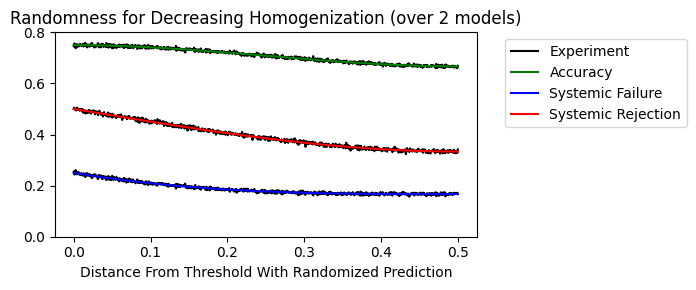

In [51]:
plot_metrics(exp2, sol2, 2)

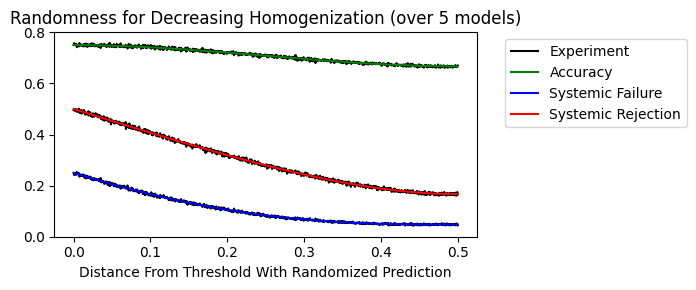

In [53]:
plot_metrics(exp5, sol5, 5)

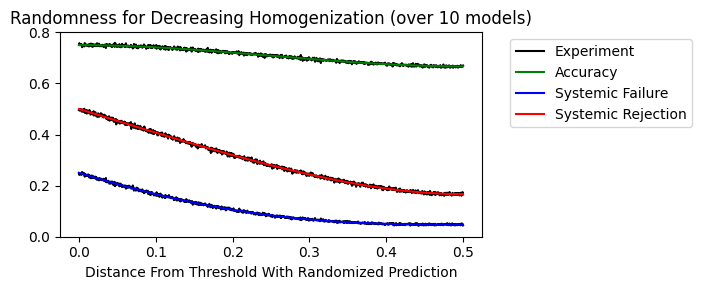

In [54]:
plot_metrics(exp5, sol5, 10)

In [75]:
col1 = "#10451D"
col2 = "#155D27"
col3 = "#1A7431"
col4 = "#208B3A"
col5 = "#25A244"
col6 = "#2DC653"
col7 = "#4AD66D"
col8 = "#6EDE8A"
col9 = "#92E6A7"
col10 = "#B7EFC5"

def plot_models(metric="failure", title="Failure"):
    plt.rcParams["figure.figsize"] = [7,3]
    fig = plt.figure()

    #plt.yticks([],fontsize=12)

    #plt.xlim(-1,1)
    #plt.xticks(np.arange(-50, 55, 25),fontsize=12)

    plt.ylabel('Systemic '+title)
    plt.xlabel('Distance From Threshold With Randomized Prediction')
    plt.title('Randomness for Decreasing Systemic ' + title)
    
    x = np.linspace(0,0.5,1000)
    
    plt.plot(x,np.array(sol2[metric]), col9, label='2')
    plt.plot(x,np.array(sol3[metric]), col8, label='3')
    plt.plot(x,np.array(sol4[metric]), col7, label='4')
    plt.plot(x,np.array(sol5[metric]), col6, label='5')
    plt.plot(x,np.array(sol6[metric]), col5, label='6')
    plt.plot(x,np.array(sol7[metric]), col4, label='7')
    plt.plot(x,np.array(sol8[metric]), col3, label='8')
    plt.plot(x,np.array(sol9[metric]), col2, label='9')
    plt.plot(x,np.array(sol10[metric]), col1, label='10')

    plt.legend(title="Num Models", bbox_to_anchor=(1.05, 1.0), loc='upper left')
    #plt.plot(x,upper, '--', color='k')
    #plt.plot(x,lower, '--', color='k')
    fig.tight_layout()
    plt.show()
    fig.savefig('plot.png')

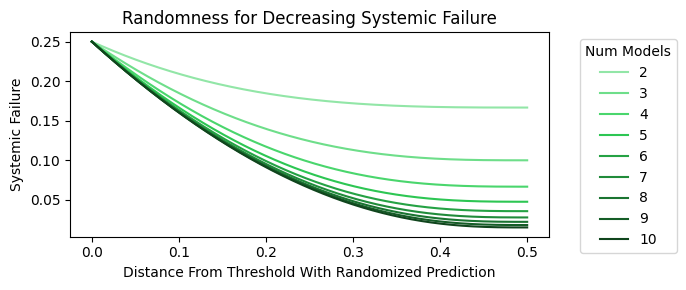

In [79]:
plot_models('failure', "Failure")

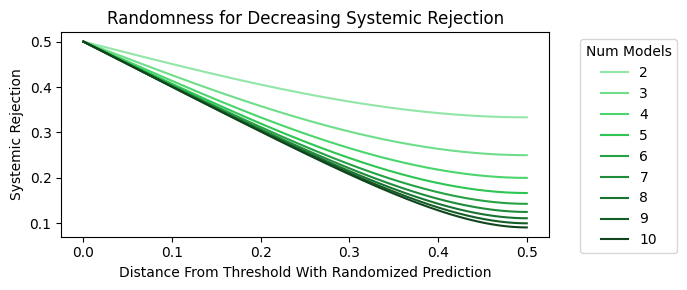

In [80]:
plot_models('rejection', "Rejection")